<a href="https://colab.research.google.com/github/eunpro/academy/blob/main/exam05_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
pd.set_option('display.max_columns',15)
pd.set_option('display.max_row',500)

In [ ]:
raw_data = sns.load_dataset('titanic')
raw_data.head(50)#head()는 기본 5개까지만 보여줌

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [ ]:
print(raw_data.info()) #함수를 이용하여 데이터 df의 정보를 출력

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB
None


deck은 지우고

age는 나머지 결측치 채움

In [ ]:
#총 null값 개수
raw_data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
#정제한 데이터 clean_data 지정
clean_data = raw_data.dropna(axis=1, thresh=500) #nan값이 500보다 크면 drop
#dropna: nan값이 존재하는 열을 버림
print(clean_data.columns)

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')


In [ ]:
#클래스별 개수
#열 값에 따른 개수 세기
clean_data['pclass'].value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

In [ ]:
print(clean_data.head(10))

   survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0         0       3    male  22.0      1      0   7.2500        S   Third   
1         1       1  female  38.0      1      0  71.2833        C   First   
2         1       3  female  26.0      0      0   7.9250        S   Third   
3         1       1  female  35.0      1      0  53.1000        S   First   
4         0       3    male  35.0      0      0   8.0500        S   Third   
5         0       3    male   NaN      0      0   8.4583        Q   Third   
6         0       1    male  54.0      0      0  51.8625        S   First   
7         0       3    male   2.0      3      1  21.0750        S   Third   
8         1       3  female  27.0      0      2  11.1333        S   Third   
9         1       2  female  14.0      1      0  30.0708        C  Second   

     who  adult_male  embark_town alive  alone  
0    man        True  Southampton    no  False  
1  woman       False    Cherbourg   yes  False  
2  wo

In [ ]:
#나이는 평균으로 채우기
mean_age = clean_data['age'].mean()
mean_age

29.69911764705882

In [ ]:
#fillna: age컬럼의 nan값을 mean_age로 채움
#dropna: nan값을 지움
clean_data['age'].fillna(mean_age, inplace=True) 
#inplace=True clean_data원본 수정, False일 경우 새로운 데이터프레임 생성(원본수정 안됨)                                  

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
print(clean_data.head(10))

   survived  pclass     sex        age  sibsp  parch     fare embarked  \
0         0       3    male  22.000000      1      0   7.2500        S   
1         1       1  female  38.000000      1      0  71.2833        C   
2         1       3  female  26.000000      0      0   7.9250        S   
3         1       1  female  35.000000      1      0  53.1000        S   
4         0       3    male  35.000000      0      0   8.0500        S   
5         0       3    male  29.699118      0      0   8.4583        Q   
6         0       1    male  54.000000      0      0  51.8625        S   
7         0       3    male   2.000000      3      1  21.0750        S   
8         1       3  female  27.000000      0      2  11.1333        S   
9         1       2  female  14.000000      1      0  30.0708        C   

    class    who  adult_male  embark_town alive  alone  
0   Third    man        True  Southampton    no  False  
1   First  woman       False    Cherbourg   yes  False  
2   Third  wom

In [ ]:
#'embark_town','alive' 컬럼 삭제
clean_data.drop(['embark_town','alive'],axis=1,inplace=True) #열column:1, 행row:0


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    891 non-null    int64   
 1   pclass      891 non-null    int64   
 2   sex         891 non-null    object  
 3   age         891 non-null    float64 
 4   sibsp       891 non-null    int64   
 5   parch       891 non-null    int64   
 6   fare        891 non-null    float64 
 7   embarked    889 non-null    object  
 8   class       891 non-null    category
 9   who         891 non-null    object  
 10  adult_male  891 non-null    bool    
 11  alone       891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(3)
memory usage: 65.5+ KB


In [ ]:
#'embarked' 825부터 829까지 행 보기
print(clean_data['embarked'][825:830])

825      Q
826      S
827      C
828      Q
829    NaN
Name: embarked, dtype: object


In [ ]:
clean_data['embarked'].fillna(
    method='ffill',inplace=True) #Nan값이었던 829번이 ffill을 통해 이전 값으로 채워짐

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
print(clean_data['embarked'][825:830])

825    Q
826    S
827    C
828    Q
829    Q
Name: embarked, dtype: object


In [ ]:
print(clean_data.isnull().sum())

survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      0
class         0
who           0
adult_male    0
alone         0
dtype: int64


In [ ]:
print(clean_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    891 non-null    int64   
 1   pclass      891 non-null    int64   
 2   sex         891 non-null    object  
 3   age         891 non-null    float64 
 4   sibsp       891 non-null    int64   
 5   parch       891 non-null    int64   
 6   fare        891 non-null    float64 
 7   embarked    891 non-null    object  
 8   class       891 non-null    category
 9   who         891 non-null    object  
 10  adult_male  891 non-null    bool    
 11  alone       891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(3)
memory usage: 65.5+ KB
None


In [ ]:
#'sex' 값 변환
clean_data['sex'].replace({'male':0,'female':1},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
print(clean_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    891 non-null    int64   
 1   pclass      891 non-null    int64   
 2   sex         891 non-null    int64   
 3   age         891 non-null    float64 
 4   sibsp       891 non-null    int64   
 5   parch       891 non-null    int64   
 6   fare        891 non-null    float64 
 7   embarked    891 non-null    object  
 8   class       891 non-null    category
 9   who         891 non-null    object  
 10  adult_male  891 non-null    bool    
 11  alone       891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(5), object(2)
memory usage: 65.5+ KB
None


In [ ]:
#'sex' 값 목록
print(clean_data['sex'].unique())

[0 1]


In [ ]:
#'embarked' 값 변환
print(clean_data['embarked'].unique())

['S' 'C' 'Q']


분류(Classification) 문제에서,  

기계에게 학습 시킬 Label 값이 숫자  이외로 되어 있을 경우,

숫자로 먼저 만들어 주는 것이 위에서 한 Label Encoding 이고, 
 
위처럼 한 후에, Loss를 계산하기 쉽게 만들어 주기 위해 

자동으로 unique한 값을 찾아서 라벨을 부여해 줌

벡터의 딱 한개의 요소만 1 이고, 나머지 요소는 모두 0 인 벡터로 만들어 주는 것 OneHotEncoding 

[ Label Encoding ] 

KR => 0, US => 1, UK => 2, CN => 3

[ OneHotEncoding ]

KR  => ( 1 , 0, 0, 0 )

US  => ( 0, 1, 0, 0 )

UK  => ( 0, 0, 1, 0 )

CN  => ( 0 , 0, 0, 1 )



스케일링: 어떤 값을 적절한 크기로 변환시켜 주는 것 

=> 보통 0~1 사이의 값으로 변환하여 곱해도 발산하지 않게 해줌

minmax(최소 0 최대 1 비례적 변환)

standandardization(표준정규분포 따르는 값으로 변경)

표준정규분포: 평균이 0 표준편차가 1인 분포

normalization(정규분포를 따르는 값으로 변경)

정규분포: 평균, 표준편차 다양함

In [ ]:
from sklearn import preprocessing

In [ ]:
#label_encoder
#문자를 0부터 시작하는 정수형 숫자로 바꿔주는 기능, 데이터를 label로 변환해줌
#제일 많은 것 0, 그다음 1, 맨 마지막 2
label_encoder = preprocessing.LabelEncoder() 
onehot_encoder = preprocessing.OneHotEncoder()

In [ ]:
print(clean_data['embarked'].value_counts())

S    644
C    169
Q     78
Name: embarked, dtype: int64


In [ ]:
print(clean_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    891 non-null    int64   
 1   pclass      891 non-null    int64   
 2   sex         891 non-null    int64   
 3   age         891 non-null    float64 
 4   sibsp       891 non-null    int64   
 5   parch       891 non-null    int64   
 6   fare        891 non-null    float64 
 7   embarked    891 non-null    int64   
 8   class       891 non-null    category
 9   who         891 non-null    object  
 10  adult_male  891 non-null    bool    
 11  alone       891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(6), object(1)
memory usage: 65.5+ KB
None


In [ ]:
clean_data['embarked']=label_encoder.fit_transform(clean_data['embarked'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
print(clean_data['embarked'].unique())

[2 0 1]


In [ ]:
clean_data['class']=label_encoder.fit_transform(clean_data['class'])
clean_data['who']=label_encoder.fit_transform(clean_data['who'])
print(clean_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    int64  
 1   pclass      891 non-null    int64  
 2   sex         891 non-null    int64  
 3   age         891 non-null    float64
 4   sibsp       891 non-null    int64  
 5   parch       891 non-null    int64  
 6   fare        891 non-null    float64
 7   embarked    891 non-null    int64  
 8   class       891 non-null    int64  
 9   who         891 non-null    int64  
 10  adult_male  891 non-null    bool   
 11  alone       891 non-null    bool   
dtypes: bool(2), float64(2), int64(8)
memory usage: 71.5 KB
None


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
clean_data['adult_male'] = clean_data['adult_male'].astype('int64')
print(clean_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    int64  
 1   pclass      891 non-null    int64  
 2   sex         891 non-null    int64  
 3   age         891 non-null    float64
 4   sibsp       891 non-null    int64  
 5   parch       891 non-null    int64  
 6   fare        891 non-null    float64
 7   embarked    891 non-null    int64  
 8   class       891 non-null    int64  
 9   who         891 non-null    int64  
 10  adult_male  891 non-null    int64  
 11  alone       891 non-null    bool   
dtypes: bool(1), float64(2), int64(9)
memory usage: 77.6 KB
None


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
print(clean_data['adult_male'])

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: adult_male, Length: 891, dtype: int64


In [ ]:
clean_data['alone'] = clean_data['alone'].astype(
    'int64')
print(clean_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    int64  
 1   pclass      891 non-null    int64  
 2   sex         891 non-null    int64  
 3   age         891 non-null    float64
 4   sibsp       891 non-null    int64  
 5   parch       891 non-null    int64  
 6   fare        891 non-null    float64
 7   embarked    891 non-null    int64  
 8   class       891 non-null    int64  
 9   who         891 non-null    int64  
 10  adult_male  891 non-null    int64  
 11  alone       891 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 83.7 KB
None


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
target=pd.DataFrame(clean_data.iloc[:,0], columns=['survived'])
training_data=clean_data.drop('survived',axis=1)
print(training_data.head())
print(target.head())

   pclass  sex   age  sibsp  parch     fare  embarked  class  who  adult_male  \
0       3    0  22.0      1      0   7.2500         2      2    1           1   
1       1    1  38.0      1      0  71.2833         0      0    2           0   
2       3    1  26.0      0      0   7.9250         2      2    2           0   
3       1    1  35.0      1      0  53.1000         2      0    2           0   
4       3    0  35.0      0      0   8.0500         2      2    1           1   

   alone  
0      0  
1      0  
2      1  
3      0  
4      1  
   survived
0         0
1         1
2         1
3         1
4         0


In [ ]:
value_data=training_data[['age','fare']]
print(value_data.head())

    age     fare
0  22.0   7.2500
1  38.0  71.2833
2  26.0   7.9250
3  35.0  53.1000
4  35.0   8.0500


In [ ]:
print(value_data.describe())

                age          fare
count  8.910000e+02  8.910000e+02
mean   2.562796e-16 -4.373606e-17
std    1.000562e+00  1.000562e+00
min   -2.253155e+00 -6.484217e-01
25%   -5.924806e-01 -4.891482e-01
50%    0.000000e+00 -3.573909e-01
75%    4.079260e-01 -2.424635e-02
max    3.870872e+00  9.667167e+00


In [ ]:
training_data.drop(['age','fare'],axis=1,inplace=True)
print(training_data.head())

   pclass  sex  sibsp  parch  embarked  class  who  adult_male  alone
0       3    0      1      0         2      2    1           1      0
1       1    1      1      0         0      0    2           0      0
2       3    1      0      0         2      2    2           0      1
3       1    1      1      0         2      0    2           0      0
4       3    0      0      0         2      2    1           1      1


In [ ]:
onehot_data = pd.get_dummies(training_data['pclass'])
print(onehot_data.head())

   1  2  3
0  0  0  1
1  1  0  0
2  0  0  1
3  1  0  0
4  0  0  1


In [ ]:
print(training_data.head())

   pclass  sex  sibsp  parch  embarked  class  who  adult_male  alone
0       3    0      1      0         2      2    1           1      0
1       1    1      1      0         0      0    2           0      0
2       3    1      0      0         2      2    2           0      1
3       1    1      1      0         2      0    2           0      0
4       3    0      0      0         2      2    1           1      1


In [ ]:
onehot_data = pd.get_dummies(training_data, columns=training_data.columns)
print(onehot_data.head())

   pclass_1  pclass_2  pclass_3  sex_0  sex_1  sibsp_0  sibsp_1  ...  who_0  \
0         0         0         1      1      0        0        1  ...      0   
1         1         0         0      0      1        0        1  ...      0   
2         0         0         1      0      1        1        0  ...      0   
3         1         0         0      0      1        0        1  ...      0   
4         0         0         1      1      0        1        0  ...      0   

   who_1  who_2  adult_male_0  adult_male_1  alone_0  alone_1  
0      1      0             0             1        1        0  
1      0      1             1             0        1        0  
2      0      1             1             0        0        1  
3      0      1             1             0        1        0  
4      1      0             0             1        0        1  

[5 rows x 32 columns]


In [ ]:
print(onehot_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   pclass_1      891 non-null    uint8
 1   pclass_2      891 non-null    uint8
 2   pclass_3      891 non-null    uint8
 3   sex_0         891 non-null    uint8
 4   sex_1         891 non-null    uint8
 5   sibsp_0       891 non-null    uint8
 6   sibsp_1       891 non-null    uint8
 7   sibsp_2       891 non-null    uint8
 8   sibsp_3       891 non-null    uint8
 9   sibsp_4       891 non-null    uint8
 10  sibsp_5       891 non-null    uint8
 11  sibsp_8       891 non-null    uint8
 12  parch_0       891 non-null    uint8
 13  parch_1       891 non-null    uint8
 14  parch_2       891 non-null    uint8
 15  parch_3       891 non-null    uint8
 16  parch_4       891 non-null    uint8
 17  parch_5       891 non-null    uint8
 18  parch_6       891 non-null    uint8
 19  embarked_0    891 non-null   

In [ ]:
value_data =training_data[['age', 'fare']]
print(value_data.head())

        age      fare
0 -0.592481 -0.502445
1  0.638789  0.786845
2 -0.284663 -0.488854
3  0.407926  0.420730
4  0.407926 -0.486337


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(value_data)
value_data = pd.DataFrame(scaled_data, columns=value_data.columns)#scaler처리하면 dataframe풀리므로 다시 해야함
print(value_data.head())

        age      fare
0 -0.592481 -0.502445
1  0.638789  0.786845
2 -0.284663 -0.488854
3  0.407926  0.420730
4  0.407926 -0.486337


In [ ]:
training_data = pd.concat([value_data, onehot_data], axis=1)
print(training_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 34 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           891 non-null    float64
 1   fare          891 non-null    float64
 2   pclass_1      891 non-null    uint8  
 3   pclass_2      891 non-null    uint8  
 4   pclass_3      891 non-null    uint8  
 5   sex_0         891 non-null    uint8  
 6   sex_1         891 non-null    uint8  
 7   sibsp_0       891 non-null    uint8  
 8   sibsp_1       891 non-null    uint8  
 9   sibsp_2       891 non-null    uint8  
 10  sibsp_3       891 non-null    uint8  
 11  sibsp_4       891 non-null    uint8  
 12  sibsp_5       891 non-null    uint8  
 13  sibsp_8       891 non-null    uint8  
 14  parch_0       891 non-null    uint8  
 15  parch_1       891 non-null    uint8  
 16  parch_2       891 non-null    uint8  
 17  parch_3       891 non-null    uint8  
 18  parch_4       891 non-null    

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    training_data, target, test_size=0.20)


In [ ]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(712, 34)
(712, 1)
(179, 34)
(179, 1)


In [ ]:
#train_set으로 모델 만들어 훈련
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
#Sequential 모델은 순차적으로 레이어 층을 더해주기 때문에 순차모델
#마지막은 이진분류기라 출력 1개, sigmoid모델 적용
model = Sequential()
model.add(Dense(256, input_dim=34, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64,  activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(32,  activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(16,  activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 256)               8960      
_________________________________________________________________
dropout_27 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_28 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_29 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_37 (Dense)             (None, 32)               

In [ ]:
model.compile(loss='mse',optimizer='adam',
              metrics=['binary_accuracy'])
fit_hist = model.fit(
    X_train, Y_train,batch_size=50, epochs=50,
                         validation_split=0.2)

Epoch 1/50
12/12 [==============================] - 1s 22ms/step - loss: 0.2365 - binary_accuracy: 0.6362 - val_loss: 0.2251 - val_binary_accuracy: 0.6294
Epoch 2/50
12/12 [==============================] - 0s 5ms/step - loss: 0.1987 - binary_accuracy: 0.7170 - val_loss: 0.1809 - val_binary_accuracy: 0.7762
Epoch 3/50
12/12 [==============================] - 0s 7ms/step - loss: 0.1731 - binary_accuracy: 0.7610 - val_loss: 0.1552 - val_binary_accuracy: 0.7902
Epoch 4/50
12/12 [==============================] - 0s 5ms/step - loss: 0.1564 - binary_accuracy: 0.7891 - val_loss: 0.1557 - val_binary_accuracy: 0.7902
Epoch 5/50
12/12 [==============================] - 0s 5ms/step - loss: 0.1518 - binary_accuracy: 0.8014 - val_loss: 0.1557 - val_binary_accuracy: 0.7832
Epoch 6/50
12/12 [==============================] - 0s 5ms/step - loss: 0.1393 - binary_accuracy: 0.8260 - val_loss: 0.1518 - val_binary_accuracy: 0.7762
Epoch 7/50
12/12 [==============================] - 0s 5ms/step - loss: 0.1

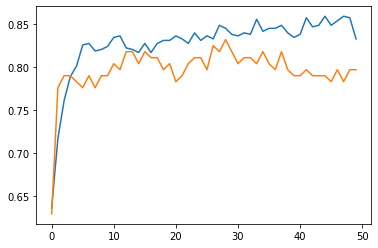

In [ ]:
import matplotlib.pyplot as plt
plt.plot(fit_hist.history['binary_accuracy'])
plt.plot(fit_hist.history['val_binary_accuracy'])
plt.show()

[검증시작]

In [ ]:
#verbose 진행사항 관련 정보(학습시간, loss값, accuracy 등) 알려줌
#0 -> 진행사항 안보여줌
#1 -> 진행사항 보여줌
#2 -> 결과만 보여줌
score = model.evaluate(X_test, Y_test, verbose=0)
print('loss :',score[0])
print('accuracy :', score[1])

loss : 0.11732975393533707
accuracy : 0.8379888534545898


[아래부터 나 혼자한 것 => 타이타닉 데이터분석]

In [ ]:
raw_data['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

In [ ]:
#null data 통계
total = raw_data.isnull().sum().sort_values(ascending=False)
ratio = (raw_data.isnull().sum() / raw_data.isnull().count() * 100).sort_values(ascending=False)

missing_data = pd.concat([total, ratio], axis=1, keys=['Total', 'Ratio'])
missing_data.head()

,Total,Ratio
deck,688,77.216611
age,177,19.865320
embark_town,2,0.224467
embarked,2,0.224467
alone,0,0.000000


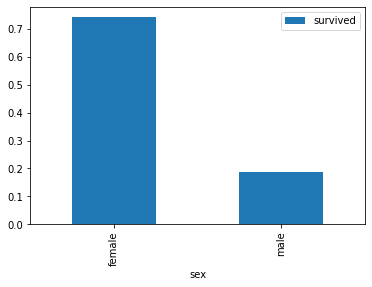

In [ ]:
#성별에 따른 생존율
sex_pivot = raw_data.pivot_table(index='sex', values='survived')
sex_pivot.plot.bar()
plt.show()

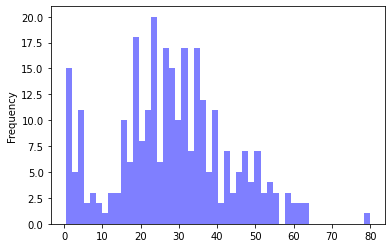

In [ ]:
#연령대에 따른 생존율
survived = raw_data[raw_data['survived']==1]
survived['age'].plot.hist(alpha=0.5, color='blue', bins=50)
plt.show()

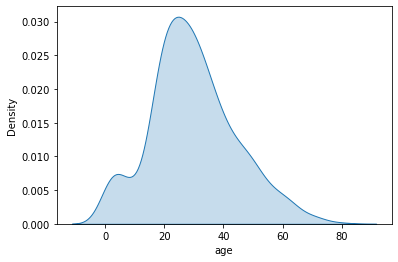

In [ ]:
#커널 밀도 추정(KDE: Kernel Density Estimator)
sns.kdeplot(raw_data['age'], shade=True)